### LangGraph 만드는 방법

In [1]:
from langgraph.graph import StateGraph

print("LangGraph successfully installed!")
!pip show langgraph
!pip show graphviz

LangGraph successfully installed!
Name: langgraph
Version: 0.2.67
Summary: Building stateful, multi-actor applications with LLMs
Home-page: https://www.github.com/langchain-ai/langgraph
Author: 
Author-email: 
License: MIT
Location: C:\Users\tree\miniconda3\envs\langchain-robot-chatbot\Lib\site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-sdk
Required-by: langchain-teddynote
Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: C:\Users\tree\miniconda3\envs\langchain-robot-chatbot\Lib\site-packages
Requires: 
Required-by: 


In [5]:
from dotenv import load_dotenv
# from langchain.chat_models import ChatOpenAI (DeprecationWarning)
from langchain_openai import ChatOpenAI
import os 

client_id = os.getenv("OPENAI_API_KEY")

if client_id is None:
    raise ValueError("OPENAI_API_KEY environment variable not set")

gpt4o_mini = ChatOpenAI(
    model_name="gpt-4o-mini",
    max_tokens=100,
    temperature=0.7,
    openai_api_key=client_id
)

gpt4o = ChatOpenAI(
    model_name="gpt-4o",
    max_tokens=150,
    temperature=0.7,
    openai_api_key=client_id
)

In [6]:
response_mini = gpt4o_mini.invoke("Hello, how are you?")

In [7]:
response_mini

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 13, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-093f6712-06d0-47d7-ab0c-aa8f17758a59-0', usage_metadata={'input_tokens': 13, 'output_tokens': 31, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
# from langchain.schema import HumanMessage

# response_full = gpt4o.invoke([HumanMessage("Hello, how are you?")])

In [9]:
response_full = gpt4o.invoke("Hello, how are you?")
response_full

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'stop', 'logprobs': None}, id='run-75984f67-82f0-4c2e-a0f7-4037e158ef5e-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [2]:
# python의 typing 모듈에서 TypedDict를 가져온다.
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# MyState라는 이름의 TypedDict를 정의한다.
class MyState(TypedDict):
    name: str
    age: int

# MyState 타입의 state를 받아 MyState 타입을 반환하는 함수를 정의한다.
def increment_age(state: MyState) -> MyState:
    return {
        "name": state["name"],
        "age": state["age"] + 1
    }

# StateGraph 객체를 생성한다.
graph = StateGraph(MyState)

# add_node를 사용하여 그래프에 노드를 추가한다.
graph.add_node("increment_age", increment_age)

# 시작 edge를 추가한다.
graph.add_edge(START, "increment_age")

# 종료 edge를 추가한다.
graph.add_edge("increment_age", END)

# complie()은 정의된 그래프를 실행 가능한 상태로 변환한다.
app = graph.compile()


그래프 시각화 (Graphviz)

###### !pip uninstall graphviz
###### !conda install graphviz 
###### 환경변수 설정도 해줘야 함

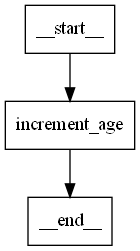

In [ ]:
import graphviz
from IPython.display import Image, display

dot = graphviz.Digraph()
nx_graph = app.get_graph()

for node in nx_graph.nodes:
    dot.node(node, shape="box")

for edge in nx_graph.edges:
    dot.edge(edge[0], edge[1])

dot.render("langgraph_output", format="png")  # langgraph_output.png로 저장
display(Image(filename="langgraph_output.png"))  # Jupyter Notebook에서 출력


그래프 시각화 v2 (from langchain_teddynote.graphs)

In [33]:
#!pip install langchain-teddynote
!pip show langchain_teddynote

Name: langchain-teddynote
Version: 0.3.42
Summary: LangChain Helper Library
Home-page: https://github.com/teddylee777/langchain-teddynote
Author: Teddy Lee
Author-email: teddylee777@gmail.com
License: 
Location: C:\Users\tree\miniconda3\envs\langchain-robot-chatbot\Lib\site-packages
Requires: anthropic, deepl, feedparser, kiwipiepy, langchain, langgraph, olefile, openai, pandas, pdf2image, pinecone-client, pinecone-text, rank-bm25, tavily-python
Required-by: 


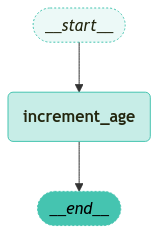

In [34]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(app)

### LangGraph 실행

In [37]:
result = app.invoke({"name": "Han Ji Sung", "age": 24})
result

{'name': 'Han Ji Sung', 'age': 25}